In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/35.1AmazonMobileDataUncleaned.csv')

In [ ]:
df.head()

,uncleanedreview,decision
0,I had the Samsung A600 for awhile which is abs...,positive
1,Due to a software issue between Nokia and Spri...,positive
2,"This is a great, reliable phone. I also purcha...",positive
3,"I love the phone and all, because I really did...",positive
4,The phone has been great for every purpose it ...,positive


In [ ]:
df.shape

(71922, 2)

# Conversion of Decision column to numeric values


In [ ]:
df['decision'].replace({'positive':1,'negative':0},inplace =True)

In [ ]:
df.head(20)

,uncleanedreview,decision
0,I had the Samsung A600 for awhile which is abs...,1
1,Due to a software issue between Nokia and Spri...,1
2,"This is a great, reliable phone. I also purcha...",1
3,"I love the phone and all, because I really did...",1
4,The phone has been great for every purpose it ...,1
5,"Hello, I have this phone and used it until I d...",1
6,Cool. Cheap. Color: 3 words that describe the ...,1
7,"The 3599i is overall a nice phone, except that...",1
8,"I've never owned a Nokia phone before, so this...",1
9,ok well im in school and i need the text messa...,0


In [ ]:
df.isnull().sum()

uncleanedreview    0
decision           0
dtype: int64

In [ ]:
df['decision'].value_counts()

1    57512
0    14410
Name: decision, dtype: int64

# Treating Unbalanced Data - Upsampling Techinique


In [ ]:
from sklearn.utils import resample
postive_data,negative_data = df['decision'].value_counts()
print(postive_data)
print(negative_data,'\n')
df_postive_data  = df[df['decision']==1]
df_negative_data = df[df['decision']==0]

df_negative_upsampled = resample(df_negative_data,replace =True,n_samples = postive_data)
df_upsampled = pd.concat([df_postive_data,df_negative_upsampled])
postive_values,negative_values = df_upsampled['decision'].value_counts()
print(postive_values)
print(negative_values)

57512
14410 

57512
57512


In [ ]:
import string
from string import punctuation
punc = list(punctuation)
for i in range(0,10):
  punc.append(str(i))

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
stops = stopwords.words('english')
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stops.remove('no')
stops.remove('not')
stops.remove('nor')

In [ ]:
ps = PorterStemmer()
lm = WordNetLemmatizer()

# Cleaning the Text

In [ ]:
def cleaned_text(sen):  
  sen = re.sub(r"didn't", "did not", sen)
  sen = re.sub(r"don't", "do not", sen)
  sen = re.sub(r"won't", "will not", sen)
  sen = re.sub(r"can't", "can not", sen)
  sen = re.sub(r"wasn't", "do not", sen)
  sen = re.sub(r"should't", "should not", sen)
  sen = re.sub(r"could't", "could not", sen)  
  sen = re.sub(r"\'ve", " have", sen)
  sen = re.sub(r"\'m", " am", sen)
  sen = re.sub(r"\'ll", " will", sen)
  sen = re.sub(r"\'re", " are", sen)
  sen = re.sub(r"\'s", " is", sen)
  sen = re.sub(r"\'d", " would", sen)
  sen = re.sub(r"\'t", " not", sen)
  sen = re.sub(r"\'m", " am", sen)
  sen = re.sub(r"n\'t", " not", sen) 
  sen = sent_tokenize(sen.lower().strip())
  word_token = []
  words =[]
  words_list =[]
  w= []
  k =[]
  for sent in sen:
      word_token.append(word_tokenize(sent))
  for word in word_token:
      words = ' '.join([i for i in word])
      words_list.append(words)
  for i in words_list:
    for j in i:
      if j in punc:
        j = ''
      else:
        j = j
      w.append(j) 
  k = ''.join([i for i in w])
  k_words= word_tokenize(k)
  final_words =[lm.lemmatize(i) for i in k_words if i not in stops and len(i)>2]
  final_words = ' '.join([i for i in final_words])
  return(final_words)

In [ ]:
punc

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [ ]:
df_upsampled['cleaned_text'] = df_upsampled['uncleanedreview'].apply(cleaned_text)

In [ ]:
df_upsampled.head()

,uncleanedreview,decision,cleaned_text
0,I had the Samsung A600 for awhile which is abs...,1,samsung awhile absolute doo doo read review de...
1,Due to a software issue between Nokia and Spri...,1,due software issue nokia sprint phone text mes...
2,"This is a great, reliable phone. I also purcha...",1,great reliable phone also purchased phone sams...
3,"I love the phone and all, because I really did...",1,love phone really need one not expect price bi...
4,The phone has been great for every purpose it ...,1,phone great every purpose offer except day bou...


In [ ]:
df_upsampled.drop(columns = ['uncleanedreview'],axis =1,inplace =True)

In [ ]:
df_upsampled.head()

,decision,cleaned_text
0,1,samsung awhile absolute doo doo read review de...
1,1,due software issue nokia sprint phone text mes...
2,1,great reliable phone also purchased phone sams...
3,1,love phone really need one not expect price bi...
4,1,phone great every purpose offer except day bou...


In [ ]:
df_upsampled.shape

(115024, 2)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df_upsampled.drop(['decision'],axis =1)
y = df_upsampled['decision']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,stratify=y,random_state =123)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((92019, 1), (23005, 1), (92019,), (23005,))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf = TfidfVectorizer(min_df = 5,ngram_range= (1,5))

In [ ]:
tf.fit(df_upsampled['cleaned_text'].values)

TfidfVectorizer(min_df=5, ngram_range=(1, 5))

In [ ]:
x_train.head()

,cleaned_text
11365,phone dirt cheap last long time
70365,great buy feel phone great come unlocked touch...
5270,received perfect condition love phone buy also...
51870,buy phone still believe japanese quality great...
36263,great phone money


# Changing the data to vectors using TFIDF vectorizer

In [ ]:
train_cleaned = tf.transform(x_train['cleaned_text'].values)
test_cleaned  = tf.transform(x_test['cleaned_text'].values)

In [ ]:
train_cleaned.shape,y_train.shape

((92019, 560101), (92019,))

# Model Creation using GridSearchCV and MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import roc_curve,auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
l =[0.5,0.5]
alphas = np.array([0.0001,0.001,0.01,0.1,1,10,100,1000,10000])
param_grid = {'alpha':alphas}
model = MultinomialNB(class_prior = l,fit_prior = False)
neigh = GridSearchCV(model,param_grid,scoring='roc_auc',cv = 5,return_train_score=True,verbose=4)
neigh.fit(train_cleaned,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..alpha=0.0001;, score=(train=0.996, test=0.972) total time=   0.2s
[CV 2/5] END ..alpha=0.0001;, score=(train=0.996, test=0.972) total time=   0.2s
[CV 3/5] END ..alpha=0.0001;, score=(train=0.996, test=0.972) total time=   0.2s
[CV 4/5] END ..alpha=0.0001;, score=(train=0.996, test=0.976) total time=   0.2s
[CV 5/5] END ..alpha=0.0001;, score=(train=0.996, test=0.972) total time=   0.2s
[CV 1/5] END ...alpha=0.001;, score=(train=0.995, test=0.973) total time=   0.2s
[CV 2/5] END ...alpha=0.001;, score=(train=0.995, test=0.973) total time=   0.2s
[CV 3/5] END ...alpha=0.001;, score=(train=0.995, test=0.972) total time=   0.2s
[CV 4/5] END ...alpha=0.001;, score=(train=0.995, test=0.976) total time=   0.2s
[CV 5/5] END ...alpha=0.001;, score=(train=0.995, test=0.972) total time=   0.2s
[CV 1/5] END ....alpha=0.01;, score=(train=0.993, test=0.972) total time=   0.2s
[CV 2/5] END ....alpha=0.01;, score=(train=0.993,

GridSearchCV(cv=5,
             estimator=MultinomialNB(class_prior=[0.5, 0.5], fit_prior=False),
             param_grid={'alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])},
             return_train_score=True, scoring='roc_auc', verbose=4)

In [ ]:
results = pd.DataFrame.from_dict(neigh.cv_results_)

In [ ]:
best_param = results['param_alpha']
train_auc  = results['mean_train_score']
test_auc   = results['mean_test_score']
log_alphas = []
for i in range(0,len(best_param)):
  value = math.log10(best_param[i])
  log_alphas.append(value)
log_alphas.sort()

In [ ]:
neigh.best_params_['alpha']

0.001

Accuracy Graph by alphas values


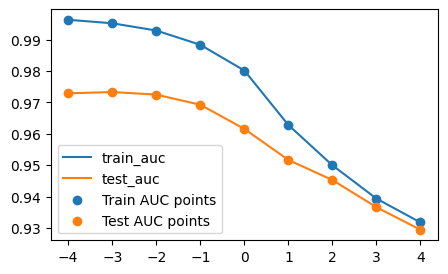

{'alpha': 0.001}
0.9732849540451148
best alpha log value-   -3.0


In [ ]:
plt.figure(figsize=(5,3))
plt.plot(log_alphas,train_auc,label = 'train_auc')
plt.plot(log_alphas,test_auc, label = 'test_auc')
plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, test_auc, label='Test AUC points')
plt.legend()
plt.show()
print(neigh.best_params_)
print(neigh.best_score_)
print('best alpha log value-  ',math.log10(neigh.best_params_['alpha']))

# Finding the Thershold value using the ROC- AUC

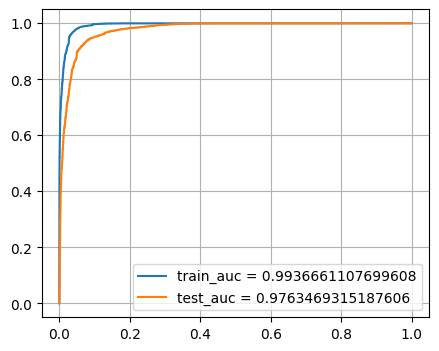

 best Thershold is -  0.81
Maximum value of tpr*(1-fpr) is -  0.93


In [ ]:
l = [0.5,0.5]
model = MultinomialNB(alpha=0.001,class_prior = l,fit_prior = False)
model.fit(train_cleaned,y_train)

y_train_prob = model.predict_proba(train_cleaned)[:,1]
y_test_prob  = model.predict_proba(test_cleaned)[:,1]

train_fpr,train_tpr, train_thershold = roc_curve(y_train,y_train_prob)
test_fpr, test_tpr,  test_thershold  = roc_curve(y_test,y_test_prob)

plt.figure(figsize=(5,4))
plt.plot(train_fpr, train_tpr, label = "train_auc = "+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,  test_tpr,  label = "test_auc = "+str(auc(test_fpr,  test_tpr)))
plt.legend()
plt.grid()
plt.show()

thershold = train_thershold[np.argmax(train_tpr*(1-train_fpr))]
print(" best Thershold is - ", round(thershold,2))
print('Maximum value of tpr*(1-fpr) is - ',round(max(train_tpr*(1-train_fpr)),2))

# Confusion Matrix evaluation - Without Thershold Value

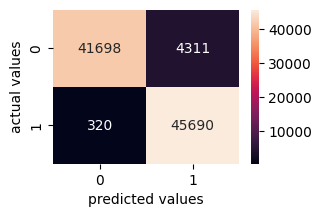

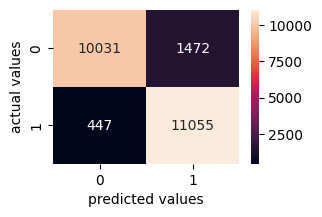

In [ ]:
y_train_pred = model.predict(train_cleaned)
y_test_pred  = model.predict(test_cleaned)
plt.figure(figsize= (3,2))
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True,fmt='d')
plt.ylabel('actual values')
plt.xlabel('predicted values')
plt.show()
plt.figure(figsize= (3,2))
sns.heatmap(confusion_matrix(y_test, y_test_pred)  ,annot=True,fmt='d')
plt.ylabel('actual values')
plt.xlabel('predicted values')
plt.show()

# Confusion Matrix evaluation - Thershold Value

In [ ]:
predictions_train = []
for i in y_train_prob:
  if i>= thershold:
    predictions_train.append(1)
  else:
    predictions_train.append(0)
    
predictions_test = []
for i in y_test_prob:
  if i>= thershold:
    predictions_test.append(1)
  else:
    predictions_test.append(0)

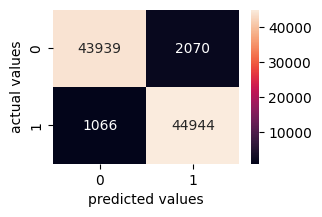

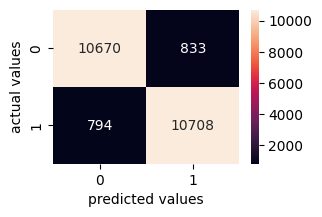

In [ ]:
plt.figure(figsize= (3,2))
sns.heatmap(confusion_matrix(y_train, predictions_train), annot=True,fmt='d')
plt.ylabel('actual values')
plt.xlabel('predicted values')
plt.show()
plt.figure(figsize= (3,2))
sns.heatmap(confusion_matrix(y_test, predictions_test )  ,annot=True,fmt='d')
plt.ylabel('actual values')
plt.xlabel('predicted values')
plt.show()

When Compared to Count Vectorizer technique Tfidf Vectorizer is performing better and MultiNomialNB is specially designed for text classification
